# Software engineering for machine learning: characterizing and detecting mismatch in machine learning systems

Developing machine learning systems is more than just building the model
The model must be tested for production, integrated into larger systems, monitored at run time, and then evolved as data changes and redeployed.

This blog post describes how they are creating and assessing emperically validated practices to guide the development of ML-enabled systems as part of AI engineering. This is an emergent discipline focused on developing tools, systems, and processes to enable the application of artificial intelligence in real-world contexts.

ML enabled systems must be engineerd such that:
* Integration of ML components is straightforward
* The system is instrumented for runtime monitoring of ML components and production data
* the cycle of training and retraining these systems is accelerated

these practices are typically not used in the field of data science, the field of study that focuses on development of ML algorithms and models that are incorporated into software systems. 


# ML Mismatch

They observed that the ability to integrate ML components into applications is limited by, among other factors, mismatches between different system components. one reason is that development and deployment of ML-enabled systems involves three distinct disciplines: data science, software engineering, and operations. the distinct perspectives of these disciplines, when misaligned, cause ML mismatches that can result in failed systems

For example, if an ML model is trained on data that is different from data in the production environment, the performance of the ML component in the field will be reduced dramatically.

What makes ML components different from the traditional components is that they are highly data dependent. Their perfomance in production thus depends on how similar the production data is to the data that was used to train the ML model. This dependency is often called the _training-serving skew_. To succeed, ML-enabled systems must provide a way to know when model performance is degrading, and they must provide enough information to effectively retrain the models when it does. The more comprehensive and detailed the information gathered the quicker a model can be developed, retrained and redeployed.

# Characterizing and detecting mismatch in ML-enabled systems

Some examples of mismatch in ML-enabled systems:
* __computing-resource mismatch__ poor system performance because the computing resources that are required to execute the model are not available in the production environment

* __data-distribution mismatch__ poor model accuracy because the training data doesn't match the production data

* __API mismatch__ the need to generate a lot of glue code because the ML component is expecting different inputs and outputs than what is provided by the system in which it is integrated

* __test-data mismatch__ inability of software engineers to properly test a component because they don't have access to test data or don't fully understand the component or know how to test it

* __monitoring mismatch__ inability of the monitoring tools in the production environment to collect ML-relevant metric,such as model

As an example of how we could use descriptors to support automated detection of mismatches at both design and run time imagine that multiple stakeholders are part of the ML-enabled system development. A project or product team would create the descriptor for the model task and purpose; a data-science team would create the descriptors for the trained model and the training data; data owners would create the descriptor for the raw data to train the model; operations personnel would create descriptors for the production environment and the production data; and software engineers would create desciptors for the development environment.

As parts of the system are being developed and the trained model is handed off from one team to another, these descriptors would ensure that all the information needed for avoiding mismatch is available explicit, and visible by all stakeholders.

# Phase 1: Categorizing Mismatches
the mismatches that are identified are sparated into categories shown in the figure below.

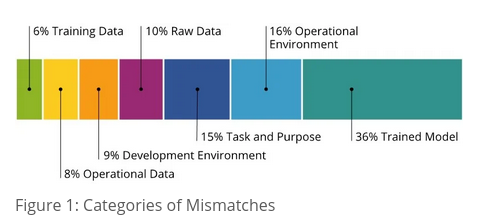

Here are some observations about the findings in these categories:
* __trained model__ mismatches in this category split evenly between information related to test cases and test data, and lack of information about the API and specifications

* __operational environment__ many of the mismatches in this category were related to runtime metrics and data. The operation staff did not know what they were supposed to monitor and data scientist had assumed that the operations staff would know how to do the monitoring and that they were collecting the needed runtime metrics and data

* __task and purpose__ this category is related to requirements: what must be communicated between project owners and data scientist so that data scientist build the model that project owners expect? 

* __raw data__ These are the datasets that data scientists or data engineers transform into training data. Most raw data mismatches were associated with lack of metadata- how it was collected, when it was collected, how it was distributed, its geograpgic location, and the time frames during during which it was collected; and descriptions of data elements as wel as information about field names, desciptions, values, and meaning of missing or null value.

* __development environment__ These mismatches most often had to do with programming languages . mismatches can result from data scientist failing to share information 

* __operational data__ Most mismatches here stemmed from lack of operational data statistics. the data that the data scientist trained the model with did not accurately represent the data in the operational environment

* __training data__ Most of these mismatches arose from lack of details of data preparation pipilines to derive training data from raw data.
